<a href="https://colab.research.google.com/github/purvilmehta06/Deep-Learning/blob/master/Lab%205/LabAssignment5_201701073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Deep Learning


*   Lab Manual: [Manual Lab 5](https://github.com/purvilmehta06/Deep-Learning/blob/master/Lab%205/Lab_Assignment_5.pdf)
*   Author: Purvil Mehta
*   Id : 201701073
*   Github Link : [Deep Learning Course Lab Work Repo](https://github.com/purvilmehta06/Deep-Learning)

# Library Initialisation

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Dropout
from tensorflow.keras import activations
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import regularizers
from tensorflow.keras import initializers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization

# Data Loading

In [51]:
# load training dataset
x_train = pd.read_csv("Churn_Modelling.csv")
x_data = x_train.iloc[:, 3:13].values 
y_data = x_train.iloc[:, 13].values 

# Data Processing 

In [52]:
labelencoder_X_1 = LabelEncoder()
x_data[:, 1] = labelencoder_X_1.fit_transform(x_data[:, 1])
labelencoder_X_2 = LabelEncoder()
x_data[:, 2] = labelencoder_X_2.fit_transform(x_data[:, 2])
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])],remainder='passthrough')
x_data = columnTransformer.fit_transform(x_data)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [4])],remainder='passthrough')
x_data = columnTransformer.fit_transform(x_data)
x_data = x_data[:, 1:]
x_data, x_test, y_data, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)

In [53]:
sc = StandardScaler()
x_data = sc.fit_transform(x_data)
x_test = sc.transform(x_test)

# Model Initialisation

In [43]:
def model_initialisation(layersNode,init,activations_2,input_size,batchNorm):
  model = Sequential()
  if(len(activations_2) != len(layersNode)):
    print("Dim does not match")
    return

  for i in range(len(activations_2)):
    if (i == 0):
      model.add(Dense(layersNode[i],input_dim=input_size, kernel_initializer = init,activation=activations_2[i]))
    else :
      model.add(Dense(layersNode[i], kernel_initializer = init,activation=activations_2[i]))
  
  return model

# Supporting Funtion

In [45]:
def calculate(layersNode,activation,init,epochs,optimizer,batchNorm):
  model = model_initialisation(layersNode,init,activation,12,batchNorm)
  ini_w = model.get_weights()
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  history_model = model.fit(x_data,y_data, epochs=epochs, batch_size=5,verbose=0)

  weights = model.get_weights()
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print("Accuracy: {}".format(cm.trace()*100/2000))
  return history_model.history['loss'],history_model.history['accuracy'],weights,ini_w

# Different Weight Initialisation

Results of Uniform Weights
[[1503   92]
 [ 191  214]]
Accuracy: 85.85
Results of Glorot Weights
[[1465  130]
 [ 170  235]]
Accuracy: 85.0
Results of He-Normal Weights
[[1493  102]
 [ 186  219]]
Accuracy: 85.6
Results of Zero Weights
[[1595    0]
 [ 405    0]]
Accuracy: 79.75


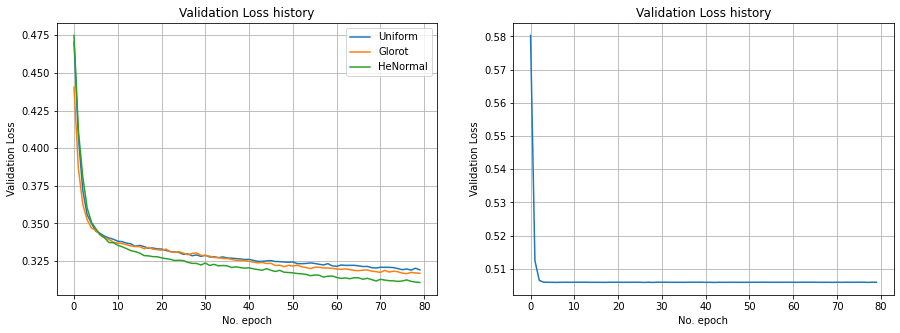

In [ ]:
epochs = 80
layersNode = [12,12,1]
activations = ['relu','relu','sigmoid']
print("Results of Uniform Weights")
ans1,acc1,w1,ini_w1 = calculate(layersNode,activations,tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5),epochs,'adam',False)
print("Results of Glorot Weights")
ans2,acc2,w2,ini_w2 = calculate(layersNode,activations,tf.keras.initializers.GlorotNormal(),epochs,'adam',False)
print("Results of He-Normal Weights")
ans3,acc3,w3,ini_w3 = calculate(layersNode,activations,tf.keras.initializers.HeNormal(),epochs,'adam',False)
print("Results of Zero Weights")
ans4,acc4,w4,ini_w4 = calculate(layersNode,activations,tf.keras.initializers.Zeros(),epochs,'adam',False)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(ans1,label='Uniform')
plt.plot(ans2,label='Glorot')
plt.plot(ans3,label='HeNormal')
plt.title('Validation Loss history');plt.ylabel('Validation Loss');plt.xlabel('No. epoch')
plt.legend();plt.grid()
plt.subplot(1,2,2)
plt.plot(ans4,label='Zeros')
plt.title('Validation Loss history');plt.ylabel('Validation Loss');plt.xlabel('No. epoch')
plt.grid()
plt.show()

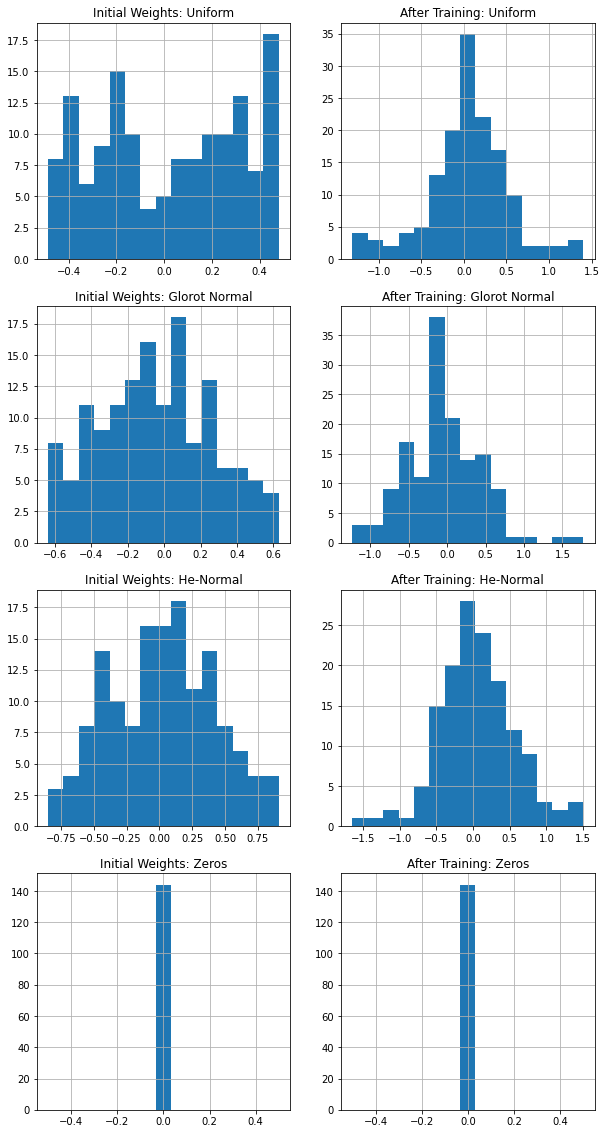

In [ ]:
titleList = ['Uniform','Glorot Normal','He-Normal','Zeros']
w = [w1,w2,w3,w4]
ini_w = [ini_w1,ini_w2,ini_w3,ini_w4]
layer = 0;bins = 15;k = 1
plt.figure(figsize=(10, 20))
for i in range(4):
  plt.subplot(4,2,k)
  plt.hist(ini_w[i][layer].flatten(),bins)
  plt.title('Initial Weights: '+titleList[i]);plt.grid()
  plt.subplot(4,2,k+1)
  plt.hist(w[i][layer].flatten(),bins)
  plt.title('After Training: ' + titleList[i]);plt.grid()
  k = k + 2
plt.show()

## Analysis

* Here we have initilised the weights with different distribution and end up getting almost same distribution.
* The main reason for this is stable NN.
* Since the NN is so stable, it become independent of initial weights and end up getting almost same distribution at the end. It is kind of **Converging to this kind of weights whose distribution is almost same as Normal Gaussisan.**
* Note that, weight matrix initialised with all zeros is not even trained in the training time. Thus it always classifies the input as "0". Thus we are getting the wrong accuracy. 
* Also, weigth matrix is not even changing, implying that we would get the all zeros after the training has been done. This is exactly appear in the above graphs.

# Different Optimizers


Results of adam
[[1465  130]
 [ 199  206]]
Accuracy: 83.55
Results of SGD
[[1506   89]
 [ 206  199]]
Accuracy: 85.25
Results of Nadam
[[1452  143]
 [ 175  230]]
Accuracy: 84.1
Results of Adagrad
[[1504   91]
 [ 317   88]]
Accuracy: 79.6


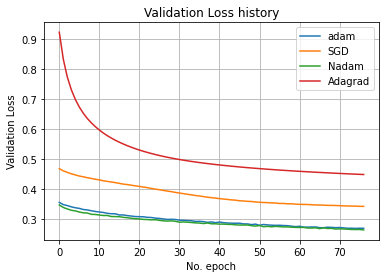

In [ ]:
epochs = 80
layersNode = [12,12,1]
activations = ['relu','relu','sigmoid']
learning_rate = 0.001
initialWeights = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5)
names = ['adam','SGD','Nadam','Adagrad']
optimizers = [tf.keras.optimizers.Adam(learning_rate=learning_rate),tf.keras.optimizers.SGD(learning_rate=learning_rate),
              tf.keras.optimizers.Nadam(learning_rate=learning_rate),tf.keras.optimizers.Adagrad(learning_rate=learning_rate)]
fans = []
for i in range(len(optimizers)):
  print("Results of {}".format(names[i]))
  ans,acc,w1,ini_w1 = calculate(layersNode,activations,initialWeights,epochs,optimizers[i],False)
  fans.append(ans);
for i in range(len(fans)):
  plt.plot(fans[i][3:],label=names[i])
plt.title('Validation Loss history')
plt.ylabel('Validation Loss');plt.xlabel('No. epoch')
plt.legend()
plt.grid()
plt.show()

## Analysis

* The main fundamental difference between Adam/Nadam and SGD is that Adam is much faster compare to SGD, but SGD has the great converging rate compare to Adam.
* Meaning, Adam may fail to converge in some cases because of it's speed as it may skip the lowest point, whereas SGD is slow but most likely to converge. 
* The same phenomena has been observed here. 
* Beacause of the dimishing learning rate, Adagrad performs very slow compare to other optimizers.  

# Batch Normalisation

[[1531   64]
 [ 209  196]]
Accuracy: 86.35
[[1484  111]
 [ 179  226]]
Accuracy: 85.5
[[1460  135]
 [ 180  225]]
Accuracy: 84.25


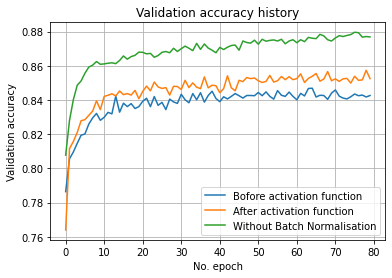

In [54]:
epochs = 80
layersNode = [50,12,1]
activations_2 = ['relu','relu','sigmoid']
init = tf.keras.initializers.HeUniform

# Batch Normalisation before activation function
model = Sequential()
model.add(Dense(layersNode[0],input_dim=12, kernel_initializer = init))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(Dense(layersNode[1], kernel_initializer = init))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(Dense(layersNode[2], kernel_initializer = init,activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_model = model.fit(x_data,y_data, epochs=epochs, batch_size=5,verbose=0)
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {}".format(cm.trace()*100/2000))

# Batch Normalisation after activation function
model = Sequential()
model.add(Dense(layersNode[0],input_dim=12, kernel_initializer = init,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(layersNode[1], kernel_initializer = init,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(layersNode[2], kernel_initializer = init,activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_model2 = model.fit(x_data,y_data, epochs=epochs, batch_size=5,verbose=0)
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {}".format(cm.trace()*100/2000))

# without batch normalisation
ans2,acc2,w2,ini_w2 = calculate(layersNode,activations_2,init,epochs,tf.keras.optimizers.SGD(learning_rate=0.01),False)

plt.plot(history_model.history['accuracy'],label='Bofore activation function')
plt.plot(history_model2.history['accuracy'],label='After activation function')
plt.plot(acc2,label='Without Batch Normalisation')
plt.title('Validation accuracy history')
plt.ylabel('Validation accuracy')
plt.xlabel('No. epoch')
plt.legend()
plt.grid()
plt.show()

# Dropout

## Overfitting Function without dropout

In [55]:
epochs = 50
layersNode = [50,60,90,10,1]
activations = ['relu','relu','relu','relu','sigmoid']
model = Sequential()
for i in range(len(activations)):
  if (i == 0):
    model.add(Dense(layersNode[i],input_dim=12,activation=activations[i]))
  else :
    model.add(Dense(layersNode[i],activation=activations[i]))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_model = model.fit(x_data, y_data, epochs=epochs, batch_size=5,verbose=0,validation_data=(x_test,y_test))

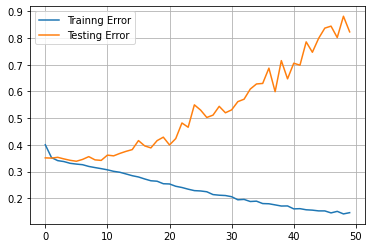

In [56]:
plt.plot(history_model.history['loss'],label='Trainng Error')
plt.plot(history_model.history['val_loss'],label='Testing Error')
plt.legend()
plt.grid()
plt.show()

## The same model with Dropout

In [58]:
epochs = 50
layersNode = [50,60,90,10,1]
activations = ['relu','relu','relu','relu','sigmoid']
dropoutRate = [0.2,0.5,0.8]
fansLOSS = []
fansValLOSS = []
for j in range(len(dropoutRate)):
  model = Sequential()
  for i in range(len(activations)):
    if (i == 0):
      model.add(Dense(layersNode[i],input_dim=12,activation=activations[i]))
      model.add(Dropout(dropoutRate[j]))
    else :
      model.add(Dense(layersNode[i],activation=activations[i]))
      if (i<len(activations)-1):
        model.add(Dropout(dropoutRate[j]))

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  history_model2 = model.fit(x_data, y_data, epochs=epochs, batch_size=5,verbose=0,validation_data=(x_test,y_test))
  fansLOSS.append(history_model2.history['loss'])
  fansValLOSS.append(history_model2.history['val_loss'])

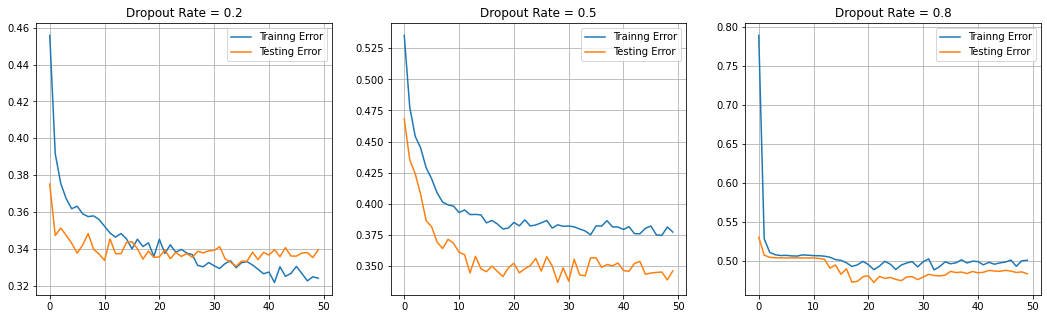

In [60]:
plt.figure(figsize=(18, 5))
for i in range(len(fansValLOSS)):
  plt.subplot(1,3,i+1)
  plt.plot(fansLOSS[i],label='Trainng Error')
  plt.plot(fansValLOSS[i],label='Testing Error')
  plt.title('Dropout Rate = {}'.format(dropoutRate[i]))
  plt.legend()
  plt.grid()
plt.show()

## Combining the results

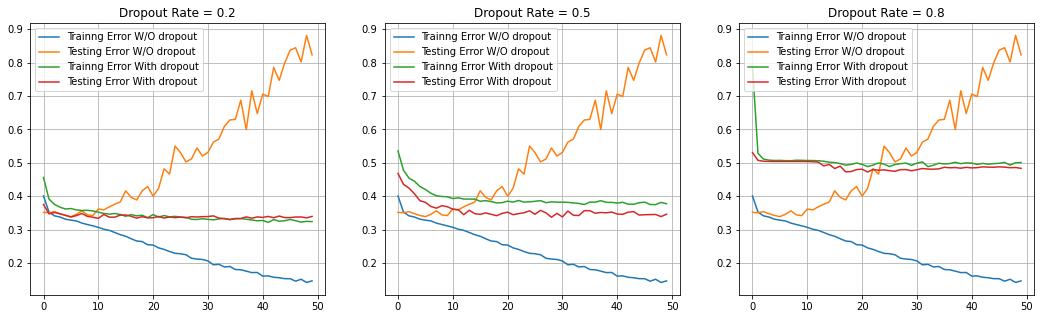

In [62]:
plt.figure(figsize=(18, 5))
for i in range(len(fansValLOSS)):
  plt.subplot(1,3,i+1)
  plt.plot(history_model.history['loss'],label='Trainng Error W/O dropout')
  plt.plot(history_model.history['val_loss'],label='Testing Error W/O dropout')
  plt.plot(fansLOSS[i],label='Trainng Error With dropout')
  plt.plot(fansValLOSS[i],label='Testing Error With dropout')
  plt.title('Dropout Rate = {}'.format(dropoutRate[i]))
  plt.legend()
  plt.grid()
plt.show()

## Analysis

* Dropout is a technique which removes the nodes from the each layer for reduces the overfitting.
* As the dropout rate increses, total number nodes in each layer decreses. Since the initial model **overfits** the data, we need to decrese the layers or nodes per layer to get the better performance. 
* Consider the graph shown above. Here when the dropout rate is 0.2 meaning 20% nodes are discarded, we found that the model is no more overfitted.  
* As the rate increses, we are getting better and better performance upto some extent. 
* If we increse the rate too much, we are hardly considering nodes in each layer, meaning if we remove 80-90% of the node from each layer, model start becoming **Under fitting**. Thus we are getting very high error in the 3rd case.